# Star Wars Fans - An Exploration
Data from a survey put out by Five Thirty Eight on the Star Wars franchise and 
people's opinions on the movies and characters.

## Preparing the data for visualizations
The data comes in an ugly CSV that's not ready to be made into graphs - let's 
fix that!

In [62]:
# importing packages that will help us process, visualize, and model our data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi']= 100

# some settings that make it easy to view the data
pd.set_option('display.max_columns', 50)

In [2]:
# read our data into a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv', 
            encoding = "ISO-8859-1")

In [3]:
# what does our data look like? We can preview the first five rows.
df.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
# columns have unhelpful names, so we'll rename them
df.columns = ['RespondentID','seen_any_films','fan','seen_episodeI',
              'seen_episodeII', 'seen_episodeIII', 'seen_episodeIV', 
              'seen_episodeV','seen_episodeVI','epI_preference',
              'epII_preference', 'epIII_preference', 'epIV_preference', 
              'epV_preference','epVI_preference','favor_han_solo',
              'favor_luke', 'favor_leia', 'favor_anakin', 'favor_obi_wan', 
              'favor_palpatine', 'favor_darth_vader', 'favor_lando', 
              'favor_boba_fett','favor_c3po', 'favor_r2d2', 
              'favor_jar_jar_binks', 'favor_padme','favor_yoda', 
              'who_shot_first','familiar_with_expanded_uni','expanded_uni_fan',
              'startrek_fan','gender', 'age', 'household_income', 'education',
              'census_region']

# first row is also a header column so we don't need it, therefore, we drop it
df.drop(0, inplace=True)

In [5]:
# should be easier to understand now! Let's look at the first five rows again.
df.head(5)

,RespondentID,seen_any_films,fan,seen_episodeI,seen_episodeII,seen_episodeIII,seen_episodeIV,seen_episodeV,seen_episodeVI,epI_preference,epII_preference,epIII_preference,epIV_preference,epV_preference,epVI_preference,favor_han_solo,favor_luke,favor_leia,favor_anakin,favor_obi_wan,favor_palpatine,favor_darth_vader,favor_lando,favor_boba_fett,favor_c3po,favor_r2d2,favor_jar_jar_binks,favor_padme,favor_yoda,who_shot_first,familiar_with_expanded_uni,expanded_uni_fan,startrek_fan,gender,age,household_income,education,census_region
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [6]:
df[df.seen_any_films != 'Yes'].head()

,RespondentID,seen_any_films,fan,seen_episodeI,seen_episodeII,seen_episodeIII,seen_episodeIV,seen_episodeV,seen_episodeVI,epI_preference,epII_preference,epIII_preference,epIV_preference,epV_preference,epVI_preference,favor_han_solo,favor_luke,favor_leia,favor_anakin,favor_obi_wan,favor_palpatine,favor_darth_vader,favor_lando,favor_boba_fett,favor_c3po,favor_r2d2,favor_jar_jar_binks,favor_padme,favor_yoda,who_shot_first,familiar_with_expanded_uni,expanded_uni_fan,startrek_fan,gender,age,household_income,education,census_region
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
12,3.292635e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,3.292448e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",High school degree,East South Central
35,3.292298e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,30-44,"$50,000 - $99,999",Graduate degree,East South Central
47,3.292202e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Male,18-29,"$0 - $24,999",High school degree,Pacific


It seems like the if the respondent hadn't watched any Star Wars films, they were automatically directed to demographic questions, so we'll have to be careful of that when we're creating visualizations.

In [7]:
# replace all the NaN values with 0 and everything else with 1 in seen_episode
# columns to indicate 'yes I've seen it' or 'no I haven't
df['seen_episodeI'] = np.where(df.seen_episodeI == 'Star Wars: Episode I  The Phantom Menace', 1, 0)
df['seen_episodeII'] = np.where(df.seen_episodeII == 'Star Wars: Episode II  Attack of the Clones', 1, 0)
df['seen_episodeIII'] = np.where(df.seen_episodeIII == 'Star Wars: Episode III  Revenge of the Sith', 1, 0)
df['seen_episodeIV'] = np.where(df.seen_episodeIV == 'Star Wars: Episode IV  A New Hope', 1, 0)
df['seen_episodeV'] = np.where(df.seen_episodeV == 'Star Wars: Episode V The Empire Strikes Back', 1, 0)
df['seen_episodeVI'] = np.where(df.seen_episodeVI == 'Star Wars: Episode VI Return of the Jedi', 1, 0)

Below, we can see that all of the movie title have been replaced with 1's to 
indicate that the respondent has seen the movie.

In [8]:
df.head()

,RespondentID,seen_any_films,fan,seen_episodeI,seen_episodeII,seen_episodeIII,seen_episodeIV,seen_episodeV,seen_episodeVI,epI_preference,epII_preference,epIII_preference,epIV_preference,epV_preference,epVI_preference,favor_han_solo,favor_luke,favor_leia,favor_anakin,favor_obi_wan,favor_palpatine,favor_darth_vader,favor_lando,favor_boba_fett,favor_c3po,favor_r2d2,favor_jar_jar_binks,favor_padme,favor_yoda,who_shot_first,familiar_with_expanded_uni,expanded_uni_fan,startrek_fan,gender,age,household_income,education,census_region
1,3.292880e+09,Yes,Yes,1,1,1,1,1,1,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,1,1,1,0,0,0,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,1,1,1,1,1,1,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,1,1,1,1,1,1,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Creating Visualizations
Now that the data is cleaned up a bit, we can create visualizations to 
understand what the data is telling us a bit better.

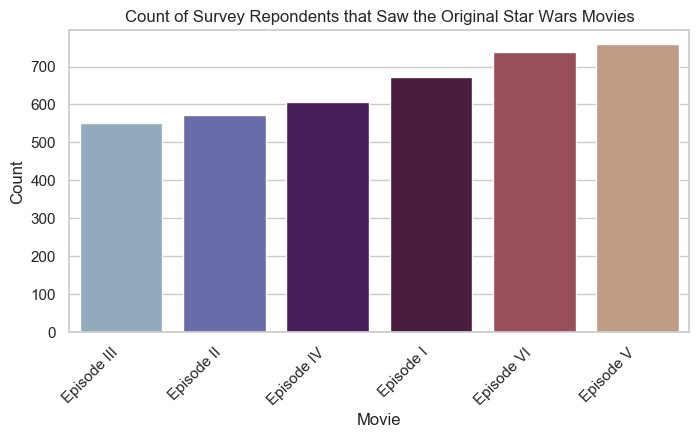

In [84]:
# plotting how many folks watched each movie
plt.figure(figsize=(8,4))
chart = sns.barplot(x=['Episode III', 
                       'Episode II', 
                       'Episode IV', 
                       'Episode I',
                       'Episode VI',
                       'Episode V'], 
                    y=df[['seen_episodeI', 'seen_episodeII', 'seen_episodeIII', 
                      'seen_episodeIV', 'seen_episodeV', 
                      'seen_episodeVI']].sum().sort_values(),
                    palette='twilight')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right")
plt.xlabel("Movie")
plt.ylabel("Count")
plt.title("Count of Survey Repondents that Saw the Original Star Wars Movies");

It makes some sense to me that episodes I, II, and III decreased in viewership
as they came out -- they're regarded by many as getting increasingly hokey! As
for IV, V, and VI, it's interesting that more folks saw V and VI than IV. It 
seems normal for peope to watch IV, V, and VI, then I, II, and III (or maybe
not even watch I, II, and III if they listen to the naysayers), but why would
_more_ people watch V than IV? Wouldn't they have wanted to see it from the 
beginning?

Let's dig into how many people just watched the first three released (IV, V,
and VI), versus those that watched everything, and see if anyone watched just
the first chronologically!

Now let's see if people regard Anakin and Darth Vader any differently! Do they
think of Anakin as a separate entity than Darth Vader? Or do they lump him into 
the same bucket of bad guy?

In [ ]:
# plotting the favor of Anakin and Darth Vader


In [ ]:
# plotting _____________

In [ ]:
# your turn! Create a bar chart by filling in the blanks below with feature 
# names, like we did above. 

## Predicting Star Trek Fans
We've explored the data a bit. Now let's see if we can predict whether someone
will be a fan of Star Trek based on the Star Wars data we have on them!